<a href="https://colab.research.google.com/github/dre1597/Alura-imersao-3/blob/main/Alura_Aula1_Imers%C3%A3o_de_dados_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1 - Imersão Alura 3

##Leitura dos dados

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

dados

###Pegando o ínicio do database

In [ ]:
dados.head()

##Pegando o número de linhas e colunas

In [ ]:
dados.shape

(23814, 877)

##Selecionando as colunas

In [8]:
dados['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [9]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Detalhes: Com droga - sobre o efeito do que foi testado // Com Controle - o grupo de controle sem o efeito do que foi testado

In [12]:
dados['tempo'].unique()

array([24, 72, 48])

Detalhes: Tempo dado em hrs

In [13]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Detalhes: Duas doses diferentes D1 e D2




In [14]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Detalhes: Provavelmente o nome das drogas usadas ou algo do tipo ( criptografado )

In [15]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

Detalhes: Provavelmente uma classificação para os genes identificados ou esperados ( normalizado ) 

##Contando os valores

In [16]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [32]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Detalhes: Valores normalizados

##Gráficos

In [ ]:
dados['tratamento'].value_counts().plot.pie()

In [ ]:
dados['tratamento'].value_counts().plot.bar()

In [ ]:
dados['tempo'].value_counts().plot.bar()

In [ ]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

#Desafios

Documentação do pandas: 
https://pandas.pydata.org/docs/reference/index.html#api

Documentação do matplotlib:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

##Desafio 01: Investigar por que a classe tratamento é tão desbalanceada

In [ ]:
#Coluna tratamento:
dados['tratamento']

In [ ]:
#Elementos únicos da coluna tratamento:
dados['tratamento'].unique()

In [ ]:
#Contagem dos valores de cada elemento único da coluna tratamento:
dados['tratamento'].value_counts()

In [ ]:
#Normalização da quantidade de valores onde podemos verificar que que temos 92.2% de tratamentos com a droga e 0.08% de tratamentos com controle.
dados['tratamento'].value_counts(normalize=True)

In [ ]:
#Podemos plotar um grafico para vermos essa diferença também.
import matplotlib.pyplot as plt

plt.bar(dados['tratamento'].unique(), list(dados['tratamento'].value_counts()))
plt.title('Tipos de tratamento utilizados')
plt.ylabel('Número de observações')
plt.xlabel('Tratamentos')
plt.show()


In [108]:
#Vamos observar apenas os experimentos com o tratamento de controle
tratamento_com_controle = dados.query('tratamento == "com_controle"')
tratamento_com_controle

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0

In [ ]:
#Aparentemente temos apenas uma droga no grupo de controle, ao menos pelas que aparecem na parte mostrada acima. Podemos verificar isso com o método unique().
tratamento_com_controle['droga'].unique()

In [ ]:
#Observando que temos 3289 drogas únicas, podemos dizer que é esse é um dos motivos para esse desbalanceamento na coluna 'tratamentos'.
len(dados['droga'].unique())

##Desafio 02: Plotar as 5 últimas linhas da tabela

In [ ]:
#Basta utilizar o método:
dados.tail()

##Desafio 03: Verificar a proporção dos dados da coluna tratamento

In [ ]:
#Basta setar o atributo normalize como True, no método value_counts
dados['tratamento'].value_counts(normalize=True)

##Desafio 04: Buscar quantas tipos de drogas foram investigadas

In [ ]:
#Basta calcular o lenght do método unique() usado na coluna 'droga'
len(dados['droga'].unique())

##Desafio 05: Procurar na documentação o método query(pandas).

Documentação do método query: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html


In [ ]:
#Exemplo 1:

dados.query('dose == "D1"')


In [ ]:
#Exemplo 2:

dados.query('tempo == 24')

In [ ]:
#Exemplo 3:

dados.query('droga == "b68db1d53"')

##Desafio 06: Adicionar titulos e labels no gráficos.(matplotlib.pyplot)

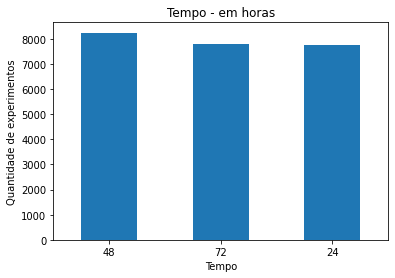

In [67]:
import matplotlib.pyplot as plt

dados['tempo'].value_counts().plot.bar()
plt.title('Tempo - em horas')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de experimentos')
plt.xticks(rotation = 0)
plt.show()


##Desafio 07: Renomear as colunas tirando o hífen.

In [141]:
def rename_columns(dados):
    for i, elem in enumerate(dados.columns.values):
        if '-' in elem:
            novo_nome = elem.replace('-','')
            dados.columns.values[i] = novo_nome

In [ ]:
rename_columns(dados)
dados.head()

##Desafio 08: Resumo do que foi aprendido com os dados.

In [72]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###Lista das observações

1.  Temos uma coluna descrita como "id", que contém identificadores únicos para cada experimento(linha do database).
2.   Temos uma coluna descrita como "tratamento", que indica se o experimento fazia parte do grupo que recebeu o tratamento com a droga ou do grupo de controle, que recebeu tudo que o grupo com a droga recebeu, menos a droga em si.
3.   Temos uma coluna descrita como "tempo", com o tempo que durou cada experimento, medido em horas.
4.  Temos uma coluna descrita como "dose", que provavalmente indica 2 tipos de doses diferentes classificadas como D1 e D2(podendo aqui serem doses com métodos de aplicações diferentes, quantidades diferentes, etc)
5.  Temos uma coluna descrita como "droga", que provavelmente indica os nomes das drogas utilizadas, mas criptografadas, possivelmente para que nem mesmo quem aplica as doses saiba qual está aplicando, como uma forma de diminuir a interferencia das ações e conclusões que poderiam já ocorrer só de saber o nome da droga aplicada.
6.  Temos colunas com nomes do tipo "g-n" e "c-n", onde n são numeros inteiros e ainda não temos muitas informações sobre.





###Detalhes das observações

####1 - Coluna 'id'

In [ ]:
dados.shape

In [ ]:
dados['id']

In [ ]:
dados['id'].shape

In [ ]:
dados.shape[0] == dados['id'].shape[0]

Podemos verificar que os ids sao únicos comparando o numero de linhas do dataframe geral de dados com o numero de linhas da série gerada pela coluna id

####2 - Coluna 'tratamento'

In [ ]:
dados['tratamento']

In [ ]:
dados['tratamento'].unique()

Temos 2 tipos de tratamento, com droga e com controle, sendo com o controle com as mesmas condições do tratamento com droga, exceto a droga em si.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

Além disso podemos verificar que a proporção entre esses 2 tipos é desbalanceada, como vimos no Desafio 1.

####3 - Coluna 'tempo'

In [ ]:
dados['tempo']

In [100]:
dados['tempo'].unique()

array([24, 72, 48])

Temos 3 valores para o tempo de experimento, 24, 48 e 72, dados em horas.

In [101]:
dados['tempo'].value_counts(normalize=True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

E podemos ver que que a proporção desses valores foi bem distribuída.

####4 - Coluna 'dose'

In [ ]:
dados['dose']

In [103]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Temos 2 valores para as doses, provavelmente 2 doses diferentes, sejam em quantidade, aplicação, etc

In [104]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Vemos novamente uma proporção bem distruída.

####5 - Coluna 'droga'

In [ ]:
dados['droga']

In [ ]:
dados['droga'].value_counts(normalize=True)

Podemos ver que a droga 'cacb2b860' aparece numa proporção maior que as outras, basicamente pois é a droga que está nos dois tipos de tratamento.

E temos 3229 drogas diferentes nos experimentos.

####6 - Outras colunas

Sobre as outras colunas ainda não temos muitas informações, apenas que provavelmente são informações sobre alguma medição referente aos genes ou outros objetivos dos experimentos. Além disso esses dados estão normalizados.